https://kimdingko-world.tistory.com/161

## 크롤링참고 링크

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

In [3]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install konlpy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
import numpy as np

train_data = pd.read_csv("멜론top100크롤링완성.csv")
train_data[:5]

,Unnamed: 0,제목,가수,가사
0,0,After LIKE,IVE (아이브),또 모르지 내 마음이\n저 날씨처럼 바뀔지\n날 나조차 다 알 수 없으니\n그게 뭐...
1,1,새삥 (Prod. ZICO) (Feat. 호미들),지코 (ZICO),기분이 째져\nAyy who's the best dresser\n반경 100m 누가...
2,2,Attention,NewJeans,You and me\n내 맘이 보이지\n한참을 쳐다봐\n가까이 다가가\nYou se...
3,3,Pink Venom,BLACKPINK,Kick in the door Waving the coco\n팝콘이나 챙겨 껴들 생...
4,4,Hype boy,NewJeans,"(1,2,3,4)\nBaby, got me looking so crazy\n빠져버리..."


In [3]:
train_data['가사'] = train_data['가사'].str.replace("[^ㄱ-하-가-힣]","")
train_data[:5]

C:\Users\98083\anaconda3\envs\suwah\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,제목,가수,가사
0,0,After LIKE,IVE (아이브),또모르지내마음이저날씨처럼바뀔지날나조차다알수없으니그게뭐가중요하니지금네게완전히푹빠졌단게...
1,1,새삥 (Prod. ZICO) (Feat. 호미들),지코 (ZICO),기분이째져반경누가젤튀어잘되면셀럽못되면평생리셀러내개성은시대를안타안타나는새삥모든게다새삥...
2,2,Attention,NewJeans,내맘이보이지한참을쳐다봐가까이다가가용기가생겼지이미아는네눈치고개를돌려천천히여기여기보이니...
3,3,Pink Venom,BLACKPINK,팝콘이나챙겨껴들생각말고눈감고안봐도척내손끝툭하나에다무너지는중가짜쇼치곤화려했지자오늘밤이...
4,4,Hype boy,NewJeans,빠져버리는너도말해줄래누가내게뭐라든남들과는달라넌날믿어봐한번예민하대나너없이는매일매일이재...


In [4]:
train_data.isnull().sum()

Unnamed: 0    0
제목            0
가수            0
가사            0
dtype: int64

시스템 환경변수를 설치해도 안되는 에러 해결..JVMNotFoundException

In [8]:
import os
os.environ['JAVA_HOME'] = r'C:\Program Files\Java\jdk-19\bin\server'

from tqdm import trange, notebook

stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

okt= Okt()
tokenized_data = []

이 부분 수정해서 다시, 불용어 처리가 덜 된거같아 
검색해보니 
https://haystar.tistory.com/11 참조
:https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt에 있는 자료로 사용하고, frequent를 살펴보면서 불용어리스트를 추가하였다.고 한다.


In [13]:
from tqdm import trange, notebook

tokenized_data =[]
with open('stopwords.txt', 'r') as f:
    list_file = f.readlines()
stopwords = list_file[0].split(",")
remove_stopwords = [x for x in tokenized_data if x not in stopwords]
len(tokenized_data)

okt= Okt()
tokenized_data = []

In [14]:
for sentence in notebook.tqdm(train_data['가사']):
    temp_X = okt.morphs(sentence, stem=True)
    temp_X = [word for word in temp_X if not word in stopwords]
    
    tokenized_data.append(temp_X)

  0%|          | 0/100 [00:00<?, ?it/s]

In [15]:
tokenized_data

[['마음',
  '날씨',
  '바뀌다',
  '지나다',
  '그게',
  '중요하다',
  '완전하다',
  '푹',
  '빠지다',
  '중요하다',
  '꿈',
  '꿈',
  '이아',
  '니야',
  '달리',
  '설명',
  '사랑',
  '방금',
  '감정',
  '감히',
  '심하다',
  '좋다',
  '조심하다',
  '심장',
  '핀새',
  '파란',
  '불꽃',
  '태양',
  '뜨겁다',
  '로또',
  '아래',
  '그래프',
  '폭',
  '크다',
  '세번',
  '피곤하다',
  '자꾸',
  '질문',
  '장점',
  '뭔',
  '솔직하다',
  '방금',
  '감정',
  '감히',
  '심하다',
  '좋다',
  '맘',
  '느끼다',
  '짜릿하다',
  '그다음',
  '아무',
  '막다',
  '눈',
  '깜빡',
  '아깝다',
  '드디어',
  '만나다',
  '반갑다',
  '사이',
  '놓이다',
  '앞또앞'],
 ['기분',
  '째다',
  '반경',
  '튀어',
  '잘',
  '셀럽',
  '평생',
  '리',
  '셀러',
  '개성',
  '시대',
  '새삥',
  '새삥',
  '옷',
  '걸치다',
  '브랜드',
  '묻다',
  '헌',
  '집',
  '새집',
  '프리미엄',
  '붙다',
  '배다',
  '배다',
  '배다',
  '새',
  '삥년',
  '유명',
  '세',
  '걷다',
  '현찰',
  '대신',
  '스펙',
  '남',
  '멋',
  '취향',
  '감추다',
  '컨카',
  '수수께끼',
  '심볼',
  '임금',
  '뽷',
  '코',
  '시국',
  '암만',
  '영끌',
  '근본',
  '대못',
  '눈팅',
  '배우다',
  '째다',
  '반경',
  '튀어',
  '자다',
  '셀럽',
  '평생',
  '리',
  '셀러',
  '개성',
  '시대',
  '새삥',
  '새삥

df = pd.DataFrame(data=tokenized_data, columns=["tokenized_lyric"])
df.to_excel("멜론top100토큰화.csv", encoding='utf-8')

## 토큰화된 데이터를 csv로 할수있는방법...ㅎ...컬럼수가 어쩌고저쩌고

가사 최대 길이: 207
가사 평균 길이:


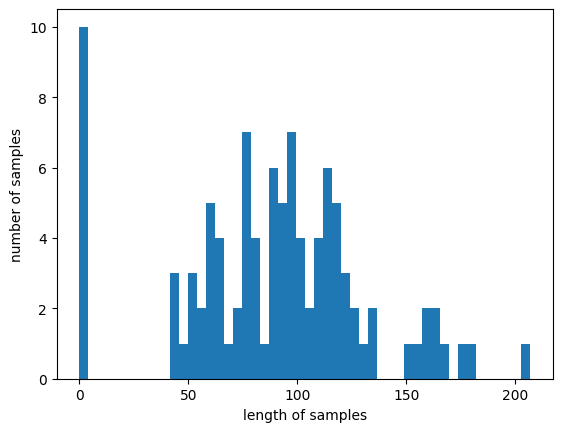

In [16]:
print("가사 최대 길이:", max(len(I) for I in tokenized_data))
print("가사 평균 길이:"), sum(map(len, tokenized_data))/len(tokenized_data)

plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [17]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=tokenized_data, size=100, window=5, min_count=5, workers=4, sg=0)

model.wv.vectors.shape

(470, 100)

In [18]:
print(model.wv.most_similar("사랑"))
similar_word = model.wv.most_similar("사랑")

[('날', 0.9716476798057556), ('마음', 0.970095157623291), ('버리다', 0.964209794998169), ('널', 0.9619814157485962), ('해', 0.9608009457588196), ('웃다', 0.9604545831680298), ('만나다', 0.9594936370849609), ('우린', 0.9594796299934387), ('떠나다', 0.9592702388763428), ('그대', 0.9577794075012207)]


In [19]:
similar_word_df = pd.DataFrame(similar_word)
similar_word_df.coloumns = ["유사단어", "유사도"]
similar_word_df

C:\Users\98083\anaconda3\envs\suwah\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,0,1
0,날,0.971648
1,마음,0.970095
2,버리다,0.964210
3,널,0.961981
4,해,0.960801
5,웃다,0.960455
6,만나다,0.959494
7,우린,0.959480
8,떠나다,0.959270
9,그대,0.957779


## 단어별 빈도 확인

# 시각화

AttributeError: The vocab attribute was removed from KeyedVector in Gensim 4.0.0.
Use KeyedVector's .key_to_index dict, .index_to_key list, and methods .get_vecattr(key, attr) and .set_vecattr(key, attr, new_val) instead.
See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4

이 오류에 대해서는 gensim 버전을 다운그레이드 해줘야핻ㅆ다

In [ ]:
pip install --upgrade gensim==3.8.3

In [ ]:
pip freeze

In [20]:
from gensim.models import Word2Vec

sentences = tokenized_data[:3]

model = Word2Vec(sentences, size=300, window=3, min_count=1, workers=1)

word_vectors = model.wv

vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [21]:
print(len(vocabs))

196


In [22]:
pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.1/7.1 MB 18.9 MB/s eta 0:00:00
     ------------------------------------- 298.0/298.0 kB 18.0 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1304 sha256=5fa9ba0045e3619c6019d4984c060f848199b7cfc516cdac26768a6574f46bc0
  Stored in directory: c:\users\98083\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #2개 차원으로 축소
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

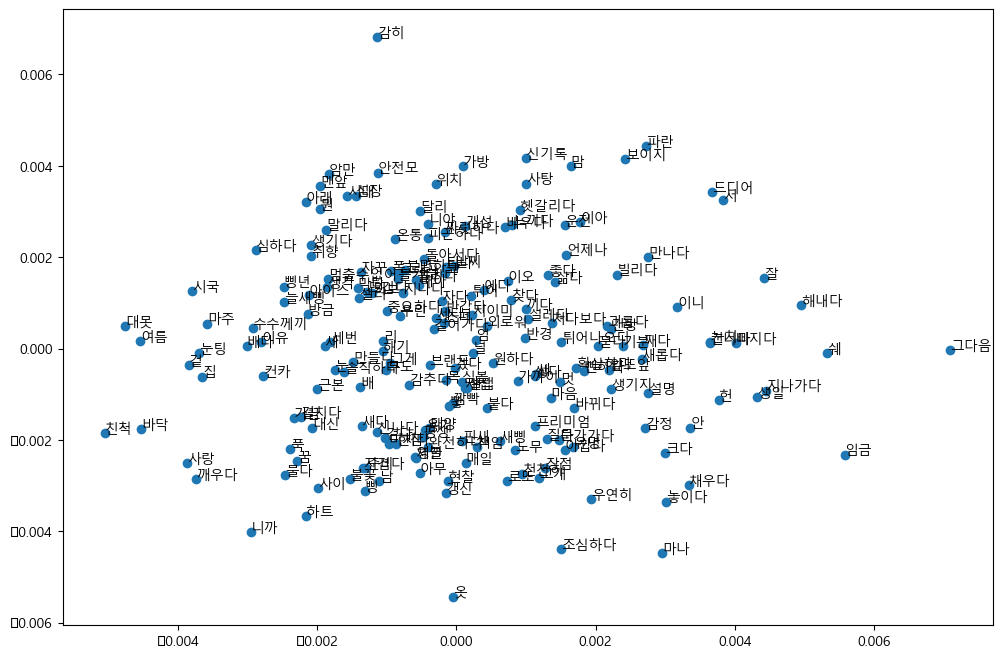

In [23]:
#단어의 2차원 x축 값, y축으로 2차원 그래프를 그린다

import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action = 'ignore')

plt.rcParams['font.family'] = 'Malgun Gothic' #인코딩 에러해결

plt.figure(figsize=(12, 8))
plt.scatter(xs, ys, marker = 'o')
for i, v in enumerate(vocabs):
    plt.annotate(v, xy=(xs[i], ys[i]))